---
# Epoch experiment

In [97]:
from linescanning import (
    utils,
    plotting,
    fitting,
    dataset,
    prf,
    simulate
)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.image as mpimg
import seaborn as sns
import os
import holeresponse as hr
opj = os.path.join

In [58]:
# get h5-file
deriv = "/data1/projects/MicroFunc/Jurjen/projects/VE-SRF/derivatives"
subject = "sub-002"
sesID = 3
data_file = opj(deriv, "lsprep", subject, f"{subject}_ses-{sesID}_desc-preproc_bold.h5")

# load in
obj_ = dataset.Dataset(
    data_file,
    verbose=True
)

DATASET
Reading from /data1/projects/MicroFunc/Jurjen/projects/VE-SRF/derivatives/lsprep/sub-002/sub-002_ses-3_desc-preproc_bold.h5
 Set attribute: df_blinks
 Set attribute: df_func_ica
 Set attribute: df_func_psc
 Set attribute: df_func_raw
 Set attribute: df_onsets
 Set attribute: df_responses
 Could not set attribute 'df_saccades'
 Set attribute: df_space_eye
 Set attribute: df_space_func

DATASET: created


In [59]:
df_onsets = obj_.fetch_onsets()
df_func = obj_.fetch_fmri(dtype="raw")
df_filt = obj_.fetch_fmri(dtype="psc")
df_func

Fetching dataframe from attribute 'df_func_raw'
Fetching dataframe from attribute 'df_func_psc'


vox 0     vox 1     vox 2     vox 3     vox 4  \
subject task run t                                                           
002     SRFa 1   0.000    0.805723  0.715391  0.733680  0.907209  0.595570   
                 0.105    0.597301  0.858279  0.901696  0.995720  0.545195   
                 0.210    0.805636  1.170914  0.922452  0.642929  0.626677   
                 0.315    0.673348  0.907332  0.849318  0.795780  1.022799   
                 0.420    0.903763  1.460808  0.634402  0.868414  1.084626   
...                            ...       ...       ...       ...       ...   
        SRFb 4   377.475  0.411817  0.383999  0.377874  0.401286  0.389016   
                 377.580  0.282406  0.355353  0.454067  0.423600  0.455302   
                 377.685  0.534016  0.333372  0.311688  0.394648  0.334368   
                 377.790  0.377336  0.507807  0.322890  0.515262  0.475639   
                 377.895  0.532893  0.490575  0.375351  0.486088  0.385665   

                             vox 5     vox 6     vox 7     vox 8     vox 9  \
subject task run t                                                           
002     SRFa 1   0.000    1.261342  0.869433  0.914795  0.950306  0.928272   
                 0.105    1.392304  0.874350  0.729040  1.041106  0.629402   
                 0.210    0.886136  0.462368  0.444961  0.892040  1.060281   
                 0.315    1.220226  1.026490  0.683844  0.593725  0.974580   
                 0.420    0.905922  0.539531  0.916962  1.214280  1.267925   
...                            ...       ...       ...       ...       ...   
        SRFb 4   377.475  0.389436  0.270983  0.495591  0.346789  0.537171   
                 377.580  0.291372  0.226127  0.423957  0.433503  0.615670   
                 377.685  0.501383  0.228969  0.391745  0.293713  0.501728   
                 377.790  0.633723  0.357387  0.327842  0.339330  0.490180   
                 377.895  0.476643  0.335078  0.435990  0.425812  0.508838   

                          ...   vox 710   vox 711   vox 712   vox 713  \
subject task run t        ...                                           
002     SRFa 1   0.000    ...  0.761350  0.679189  0.663578  0.572562   
                 0.105    ...  0.715992  0.463591  0.961701  0.677860   
                 0.210    ...  0.783108  0.685794  0.913576  0.547893   
                 0.315    ...  0.907282  1.124053  0.810043  0.663558   
                 0.420    ...  0.905738  1.064442  0.537060  0.585550   
...                       ...       ...       ...       ...       ...   
        SRFb 4   377.475  ...  0.280895  0.320710  0.634565  0.335055   
                 377.580  ...  0.584335  0.395639  0.480468  0.401710   
                 377.685  ...  0.386620  0.244201  0.623002  0.387934   
                 377.790  ...  0.595290  0.319034  0.494782  0.560671   
                 377.895  ...  0.463957  0.257508  0.636635  0.338029   

                           vox 714   vox 715   vox 716   vox 717   vox 718  \
subject task run t                                                           
002     SRFa 1   0.000    0.759992  0.673239  0.979560  0.654811  0.638408   
                 0.105    1.106797  0.833044  0.792501  0.782163  1.038051   
                 0.210    0.757758  0.819957  0.782126  0.670116  1.238066   
                 0.315    0.854052  0.659066  0.583276  1.000261  1.000676   
                 0.420    1.340561  0.531147  0.965862  0.968611  0.942456   
...                            ...       ...       ...       ...       ...   
        SRFb 4   377.475  0.324561  0.426055  0.229436  0.263599  0.441402   
                 377.580  0.513004  0.433170  0.175023  0.218907  0.391811   
                 377.685  0.566826  0.512208  0.293932  0.401618  0.369797   
                 377.790  0.498697  0.396883  0.275239  0.430015  0.473390   
                 377.895  0.381389  0.374262  0.346737  0.337034  0.340779   

                           vox 719

In [60]:
fig_dir = f"/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/images/{subject}"
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir, exist_ok=True)

In [61]:
rib_dict = {
    "sub-001": (360,369),
    # "sub-002": (360,366),
    "sub-002": (358,367),
    "sub-003": (355,362+3), # extent into wm
    "sub-006": (357,366),
    "sub-008": (357,368),
    "sub-010": (357,365)
}

ribbon = rib_dict[subject]

df_ribbon = utils.select_from_df(
    df_filt, 
    expression="ribbon", 
    indices=ribbon
)
df_ribbon

vox 358   vox 359   vox 360   vox 361   vox 362  \
subject task run t                                                           
002     SRFa 1   0.000   -2.677605 -1.608147 -2.481537 -2.337791 -2.803566   
                 0.105    0.846680 -0.803535 -1.538475 -1.177277 -1.747322   
                 0.210    1.181152  0.599937 -0.671646  0.210892  0.167107   
                 0.315   -0.110985  0.009941 -1.828026 -0.170372 -0.339737   
                 0.420    0.348740 -0.706535 -1.824631 -2.202423 -0.004074   
...                            ...       ...       ...       ...       ...   
        SRFb 4   377.475 -0.619118 -0.316750 -0.507515  0.099739  0.007835   
                 377.580 -1.672935 -1.388145 -1.130951 -1.177582 -0.684952   
                 377.685  0.140450 -0.001129  0.144943  0.407074  0.158005   
                 377.790 -1.685112 -0.829735 -1.722160 -1.561966 -1.330544   
                 377.895  0.072105  0.119820  0.161148  0.511536  0.098213   

                           vox 363   vox 364   vox 365   vox 366  
subject task run t                                                
002     SRFa 1   0.000   -4.387367 -3.170982 -3.092270 -3.057007  
                 0.105   -2.064049 -1.079559 -1.549576 -1.579025  
                 0.210    0.894035  0.514030  1.206108  0.568565  
                 0.315   -1.250793 -1.267418 -0.327225 -0.751534  
                 0.420    0.058350 -0.939873 -1.785667 -1.243095  
...                            ...       ...       ...       ...  
        SRFb 4   377.475  0.140022 -0.334053 -0.604485 -0.098976  
                 377.580 -0.123505 -0.870621 -1.084923 -0.538628  
                 377.685  0.565254  0.808395  0.357567  0.327293  
                 377.790 -0.221947 -1.117111 -0.932014 -0.547966  
                 377.895 -0.405167 -0.011658 -0.419472 -0.426491  

[25200 rows x 9 columns]

In [62]:
df_avg = pd.DataFrame(df_ribbon.mean(axis=1))
df_stims = utils.select_from_df(df_onsets,expression=("event_type != response","&","event_type != blink"))

In [63]:
df_avg

0
subject task run t                
002     SRFa 1   0.000   -2.846252
                 0.105   -1.188015
                 0.210    0.518909
                 0.315   -0.670683
                 0.420   -0.922134
...                            ...
        SRFb 4   377.475 -0.248144
                 377.580 -0.963582
                 377.685  0.323095
                 377.790 -1.105395
                 377.895 -0.033329

[25200 rows x 1 columns]

In [64]:
task_ep = fitting.Epoch(
    df_avg,
    df_stims,
    TR=0.105,
    interval=[-2,14]
)
task_df = task_ep.df_epoch.copy()
task_df.head()

0
subject task run event_type epoch t                  
002     SRFa 1   act        0     -2.000000 -0.335592
                                  -1.894737 -0.379098
                                  -1.789474 -0.186182
                                  -1.684211  0.128085
                                  -1.578947  0.021627

In [65]:
ep = fitting.Epoch(
    df_ribbon,
    df_stims,
    TR=0.105,
    interval=[-2,14]
)
ribbon_epoch = ep.df_epoch.copy()
ribbon_epoch.head()

0         1         2  \
subject task run event_type epoch t                                         
002     SRFa 1   act        0     -2.000000  0.465302  0.087669 -0.676476   
                                  -1.894737  1.309517  0.643997 -0.137787   
                                  -1.789474 -0.222168 -1.183746 -1.649635   
                                  -1.684211  0.605232  0.628952  0.565758   
                                  -1.578947 -1.357796  0.637878  0.286232   

                                                    3         4         5  \
subject task run event_type epoch t                                         
002     SRFa 1   act        0     -2.000000 -0.978004 -0.046104 -1.082352   
                                  -1.894737 -0.795280  0.029488 -0.091667   
                                  -1.789474  0.397362  0.065399 -0.518402   
                                  -1.684211  0.285217 -1.127907 -0.488548   
                                  -1.578947  0.488487 -0.363678  0.121033   

                                                    6         7         8  
subject task run event_type epoch t                                        
002     SRFa 1   act        0     -2.000000 -0.391159 -0.335785 -0.063423  
                                  -1.894737 -1.523361 -1.524605 -1.322182  
                                  -1.789474  0.736694  0.405579  0.293282  
                                  -1.684211  0.781120  0.189453 -0.286514  
                                  -1.578947  0.521431 -0.297691  0.158745

In [66]:
avg_ev = task_df.groupby(["subject","event_type","epoch","t"]).mean()
avg_ev.head()


0
subject event_type epoch t                  
002     act        0     -2.000000 -0.639667
                         -1.894737 -0.725736
                         -1.789474 -0.457292
                         -1.684211 -0.233439
                         -1.578947 -0.082137

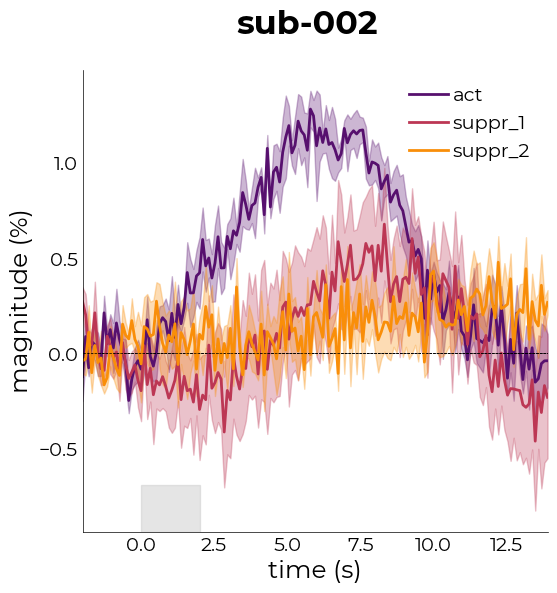

In [67]:
%matplotlib inline

evs = utils.get_unique_ids(avg_ev, id="event_type")
fig,axs = plt.subplots(figsize=(6,6))
colors = sns.color_palette("inferno", len(evs))
for ix,ev in enumerate(evs):

    ddf = utils.select_from_df(avg_ev, expression=f"event_type = {ev}")
    eps = utils.get_unique_ids(ddf, id="epoch")

    # shift baseline 
    avg_ = []
    for i in eps:
        d_ = utils.select_from_df(ddf, expression=f"epoch = {i}").values
        m_ = d_[:20].mean()
        if m_ < 0:
            d_shift = d_+abs(m_)
        else:
            d_shift = d_-m_

        avg_.append(d_shift)

    shifted = np.concatenate(avg_, axis=1)
    avg_ = shifted.mean(axis=1)
    sem_ = stats.sem(shifted, axis=1)

    t_ = np.unique(ddf.index.get_level_values("t"))
    pl = plotting.LazyPlot(
        avg_,
        xx=t_,
        error=sem_,
        axs=axs,
        color=colors[ix],
        labels=[ev],
        add_hline=0,
        x_label="time (s)",
        y_label="magnitude (%)",
        line_width=2
    )

axs.axvspan(0,2, ymax=0.1, color="#cccccc", alpha=0.5)
fig.suptitle(subject, fontsize=pl.title_size, fontweight="bold")
fname = opj(fig_dir, f"{subject}_ses-{sesID}_desc-epoch")
for ext in ["pdf", "png"]:
    fig.savefig(
        f"{fname}.{ext}",
        bbox_inches="tight",
        dpi=300,
        facecolor="white"
    ) 

In [68]:
# data = utils.select_from_df(task_df, expression=f"task = fixation")
# evs = utils.get_unique_ids(data, id="event_type")

# ev = evs[0]
# ddf = utils.select_from_df(data, expression=f"event_type = {ev}")
# ddf

In [69]:
# ddf.unstack(["run", "epoch"])

In [70]:
# task_df

In [71]:
# %matplotlib inline
# task_ids = utils.get_unique_ids(task_df, id="task")

# fig,axs = plt.subplots(ncols=len(task_ids), figsize=(6*len(task_ids),5), sharey=True, sharex=True)

# for task,ax in zip(task_ids,axs):

#     data = utils.select_from_df(task_df, expression=f"task = {task}")
#     evs = utils.get_unique_ids(data, id="event_type")
#     colors = sns.color_palette("inferno", len(evs))
#     for ix,ev in enumerate(evs):

#         ddf = utils.select_from_df(data, expression=f"event_type = {ev}").unstack(["run", "epoch"])

#         # shift baseline 
#         avg_ = []
#         for i in range(ddf.shape[-1]):
#             d_ = ddf.iloc[:,i].values
#             m_ = d_[:20].mean()
#             if m_ < 0:
#                 d_shift = d_+abs(m_)
#             else:
#                 d_shift = d_-m_

#             avg_.append(d_shift[...,np.newaxis])
        
#         shifted = np.concatenate(avg_, axis=1)
#         avg_ = shifted.mean(axis=1)
#         sem_ = stats.sem(shifted, axis=1)

#         t_ = np.unique(ddf.index.get_level_values("t"))
#         pl = plotting.LazyPlot(
#             avg_,
#             xx=t_,
#             error=sem_,
#             axs=ax,
#             color=colors[ix],
#             labels=[ev],
#             add_hline=0,
#             x_label="time (s)",
#             y_label="magnitude (%)",
#             line_width=2,
#         )

#         ax.axvspan(0,2, ymax=0.1, color="#cccccc", alpha=0.5)
#         ax.set_title(task, fontsize=pl.font_size)
        
# # fig.suptitle(subject, fontsize=pl.title_size, fontweight="bold")
# # fname = opj(fig_dir, f"{subject}_ses-{sesID}_desc-task_epoch")
# # for ext in ["pdf","png"]:
# #     fig.savefig(
# #         f"{fname}.{ext}",
# #         bbox_inches="tight",
# #         dpi=300,
# #         facecolor="white"
# #     ) 

In [72]:
# parse into single dataframe
df_f = hr.data.make_single_df(df_ribbon)
df_s = hr.data.make_single_df(df_stims, idx=["subject","run","event_type"])
df_f.head()

vox 358   vox 359   vox 360   vox 361   vox 362   vox 363  \
subject run t                                                                   
002     1   0.000 -2.677605 -1.608147 -2.481537 -2.337791 -2.803566 -4.387367   
            0.105  0.846680 -0.803535 -1.538475 -1.177277 -1.747322 -2.064049   
            0.210  1.181152  0.599937 -0.671646  0.210892  0.167107  0.894035   
            0.315 -0.110985  0.009941 -1.828026 -0.170372 -0.339737 -1.250793   
            0.420  0.348740 -0.706535 -1.824631 -2.202423 -0.004074  0.058350   

                    vox 364   vox 365   vox 366  
subject run t                                    
002     1   0.000 -3.170982 -3.092270 -3.057007  
            0.105 -1.079559 -1.549576 -1.579025  
            0.210  0.514030  1.206108  0.568565  
            0.315 -1.267418 -0.327225 -0.751534  
            0.420 -0.939873 -1.785667 -1.243095

In [73]:
epoch_all_runs = hr.data.make_single_df(task_df, idx=["subject","run","event_type","epoch","t"])
epoch_all_runs.head()

0
subject run event_type epoch t                  
002     1   act        0     -2.000000 -0.335592
                             -1.894737 -0.379098
                             -1.789474 -0.186182
                             -1.684211  0.128085
                             -1.578947  0.021627

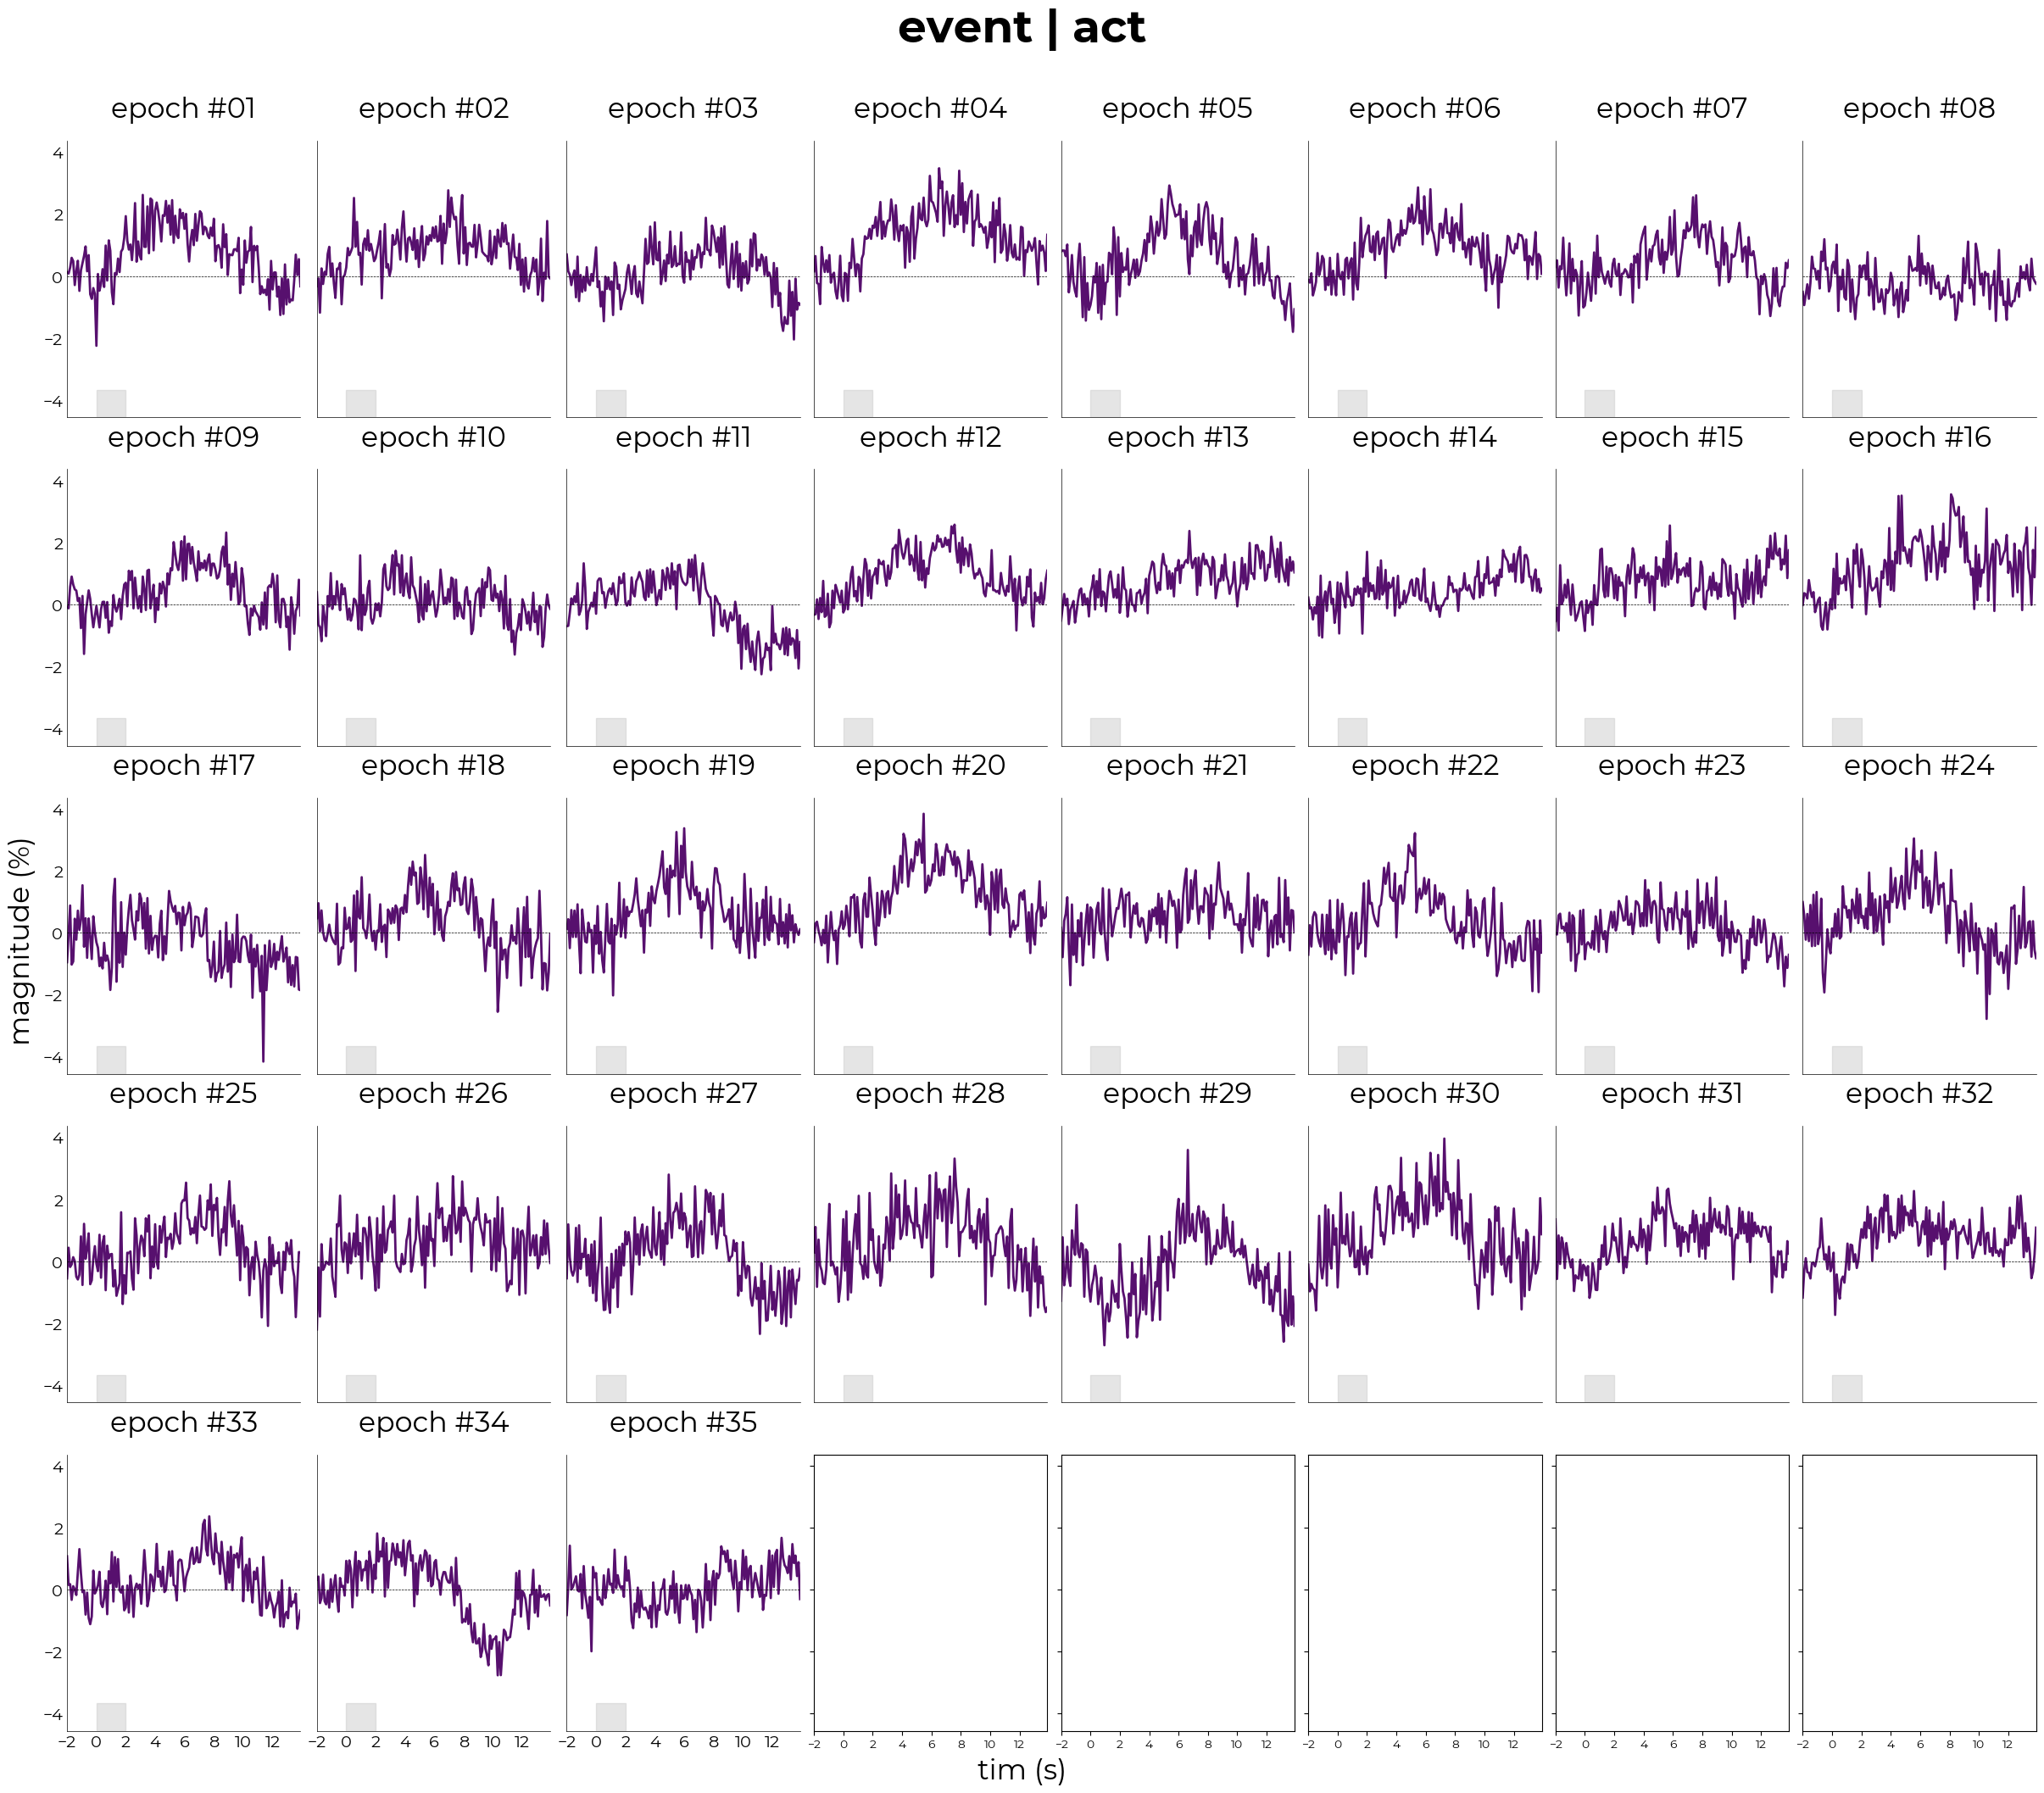

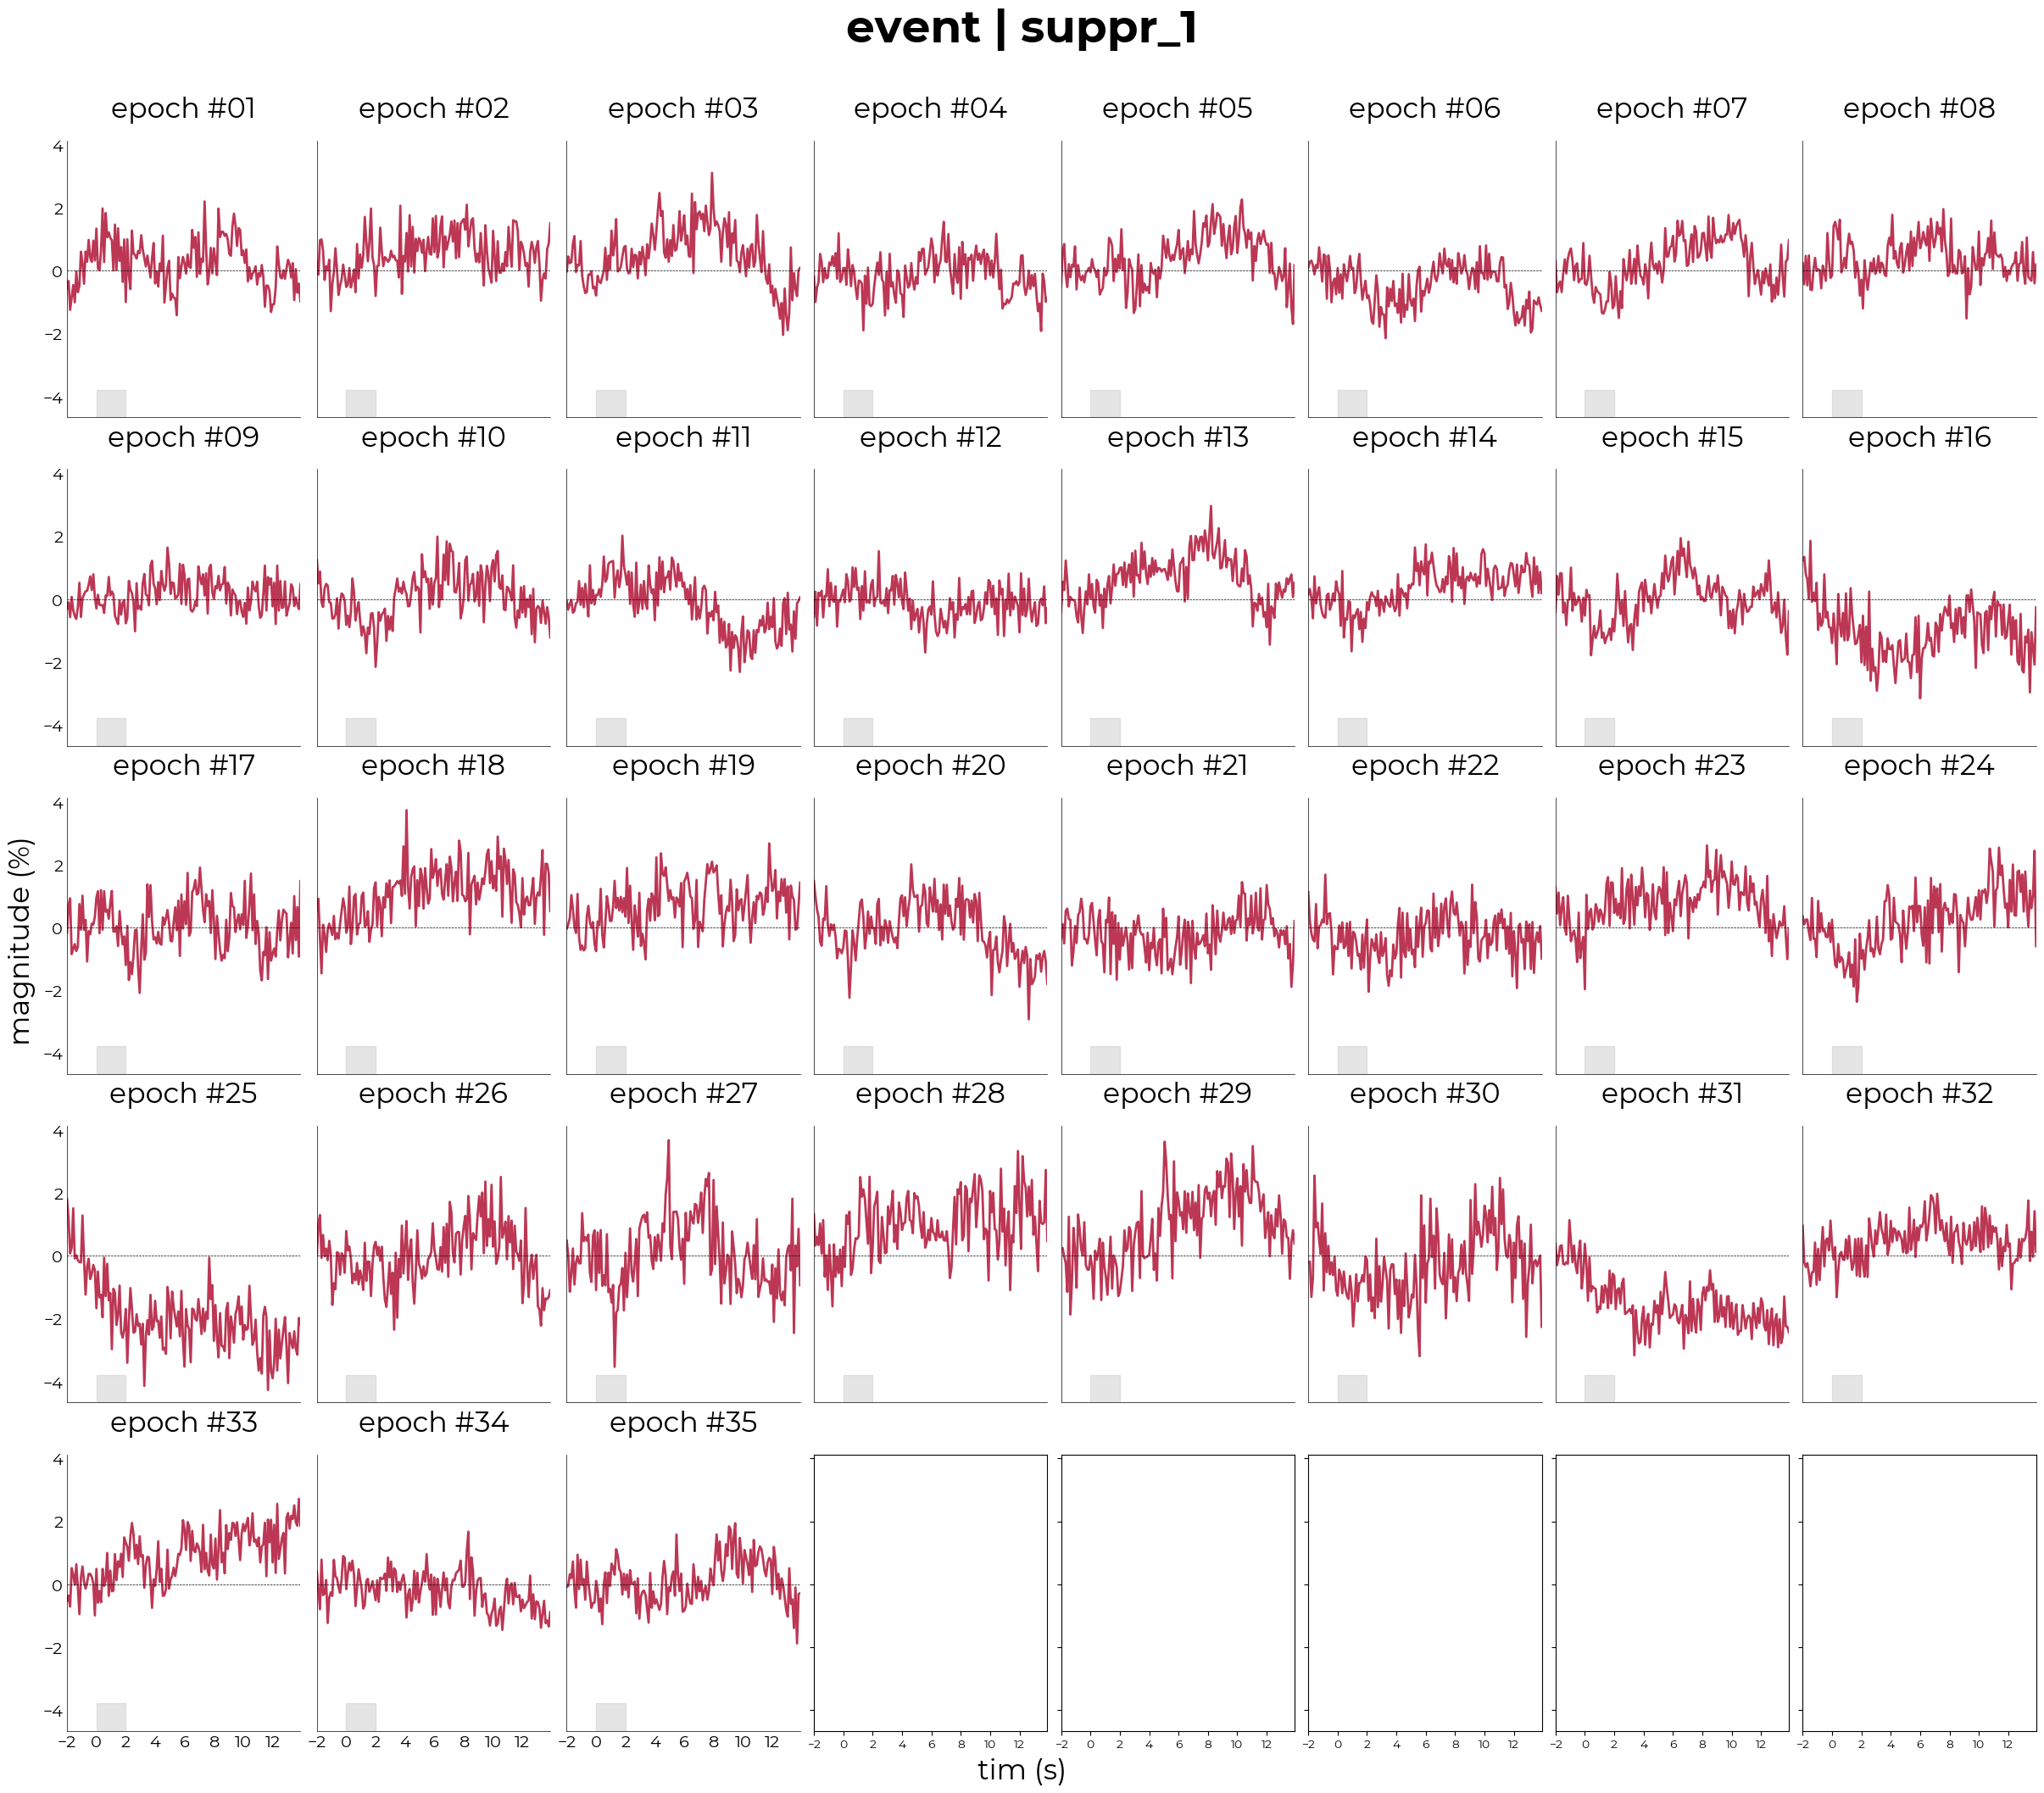

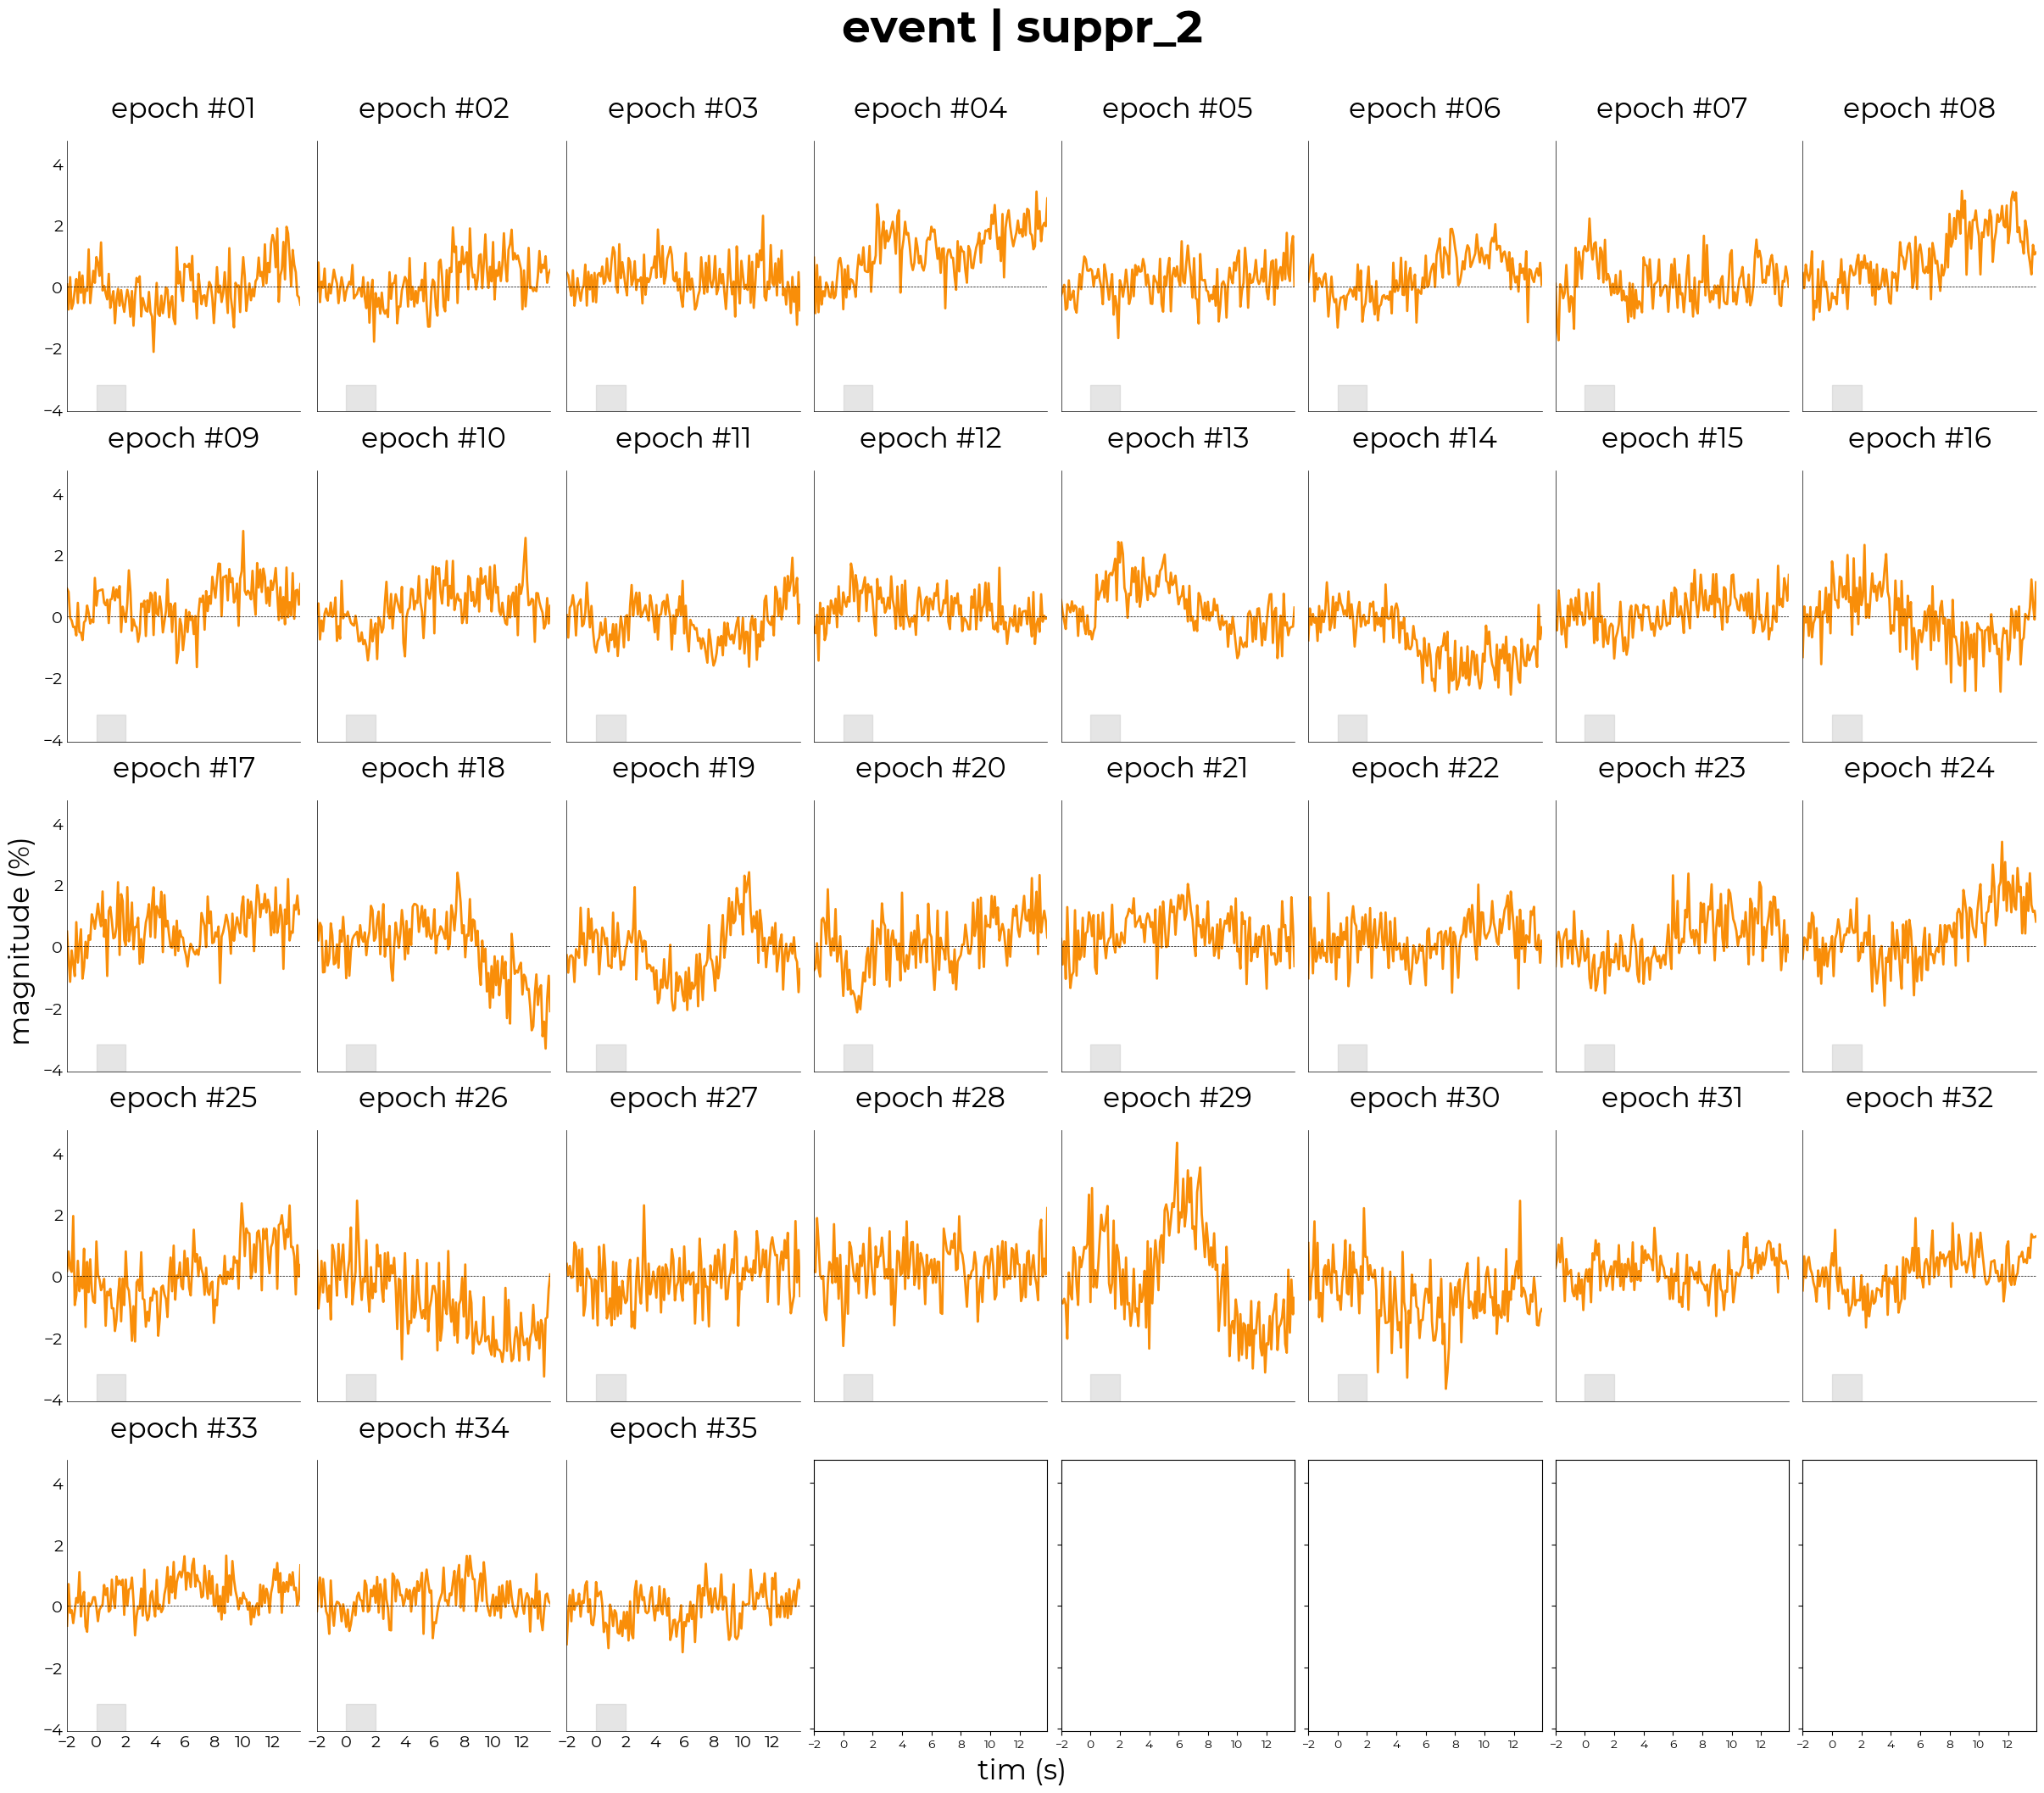

In [74]:
interval = [-2,14]
n_events = utils.get_unique_ids(epoch_all_runs, id="event_type")
n_runs = utils.get_unique_ids(epoch_all_runs, id="run")
n_epochs = utils.get_unique_ids(epoch_all_runs, id="epoch")

ncols = 8
colors = sns.color_palette("inferno", len(n_events))

for ix,ev in enumerate(n_events):
# for ix,ev in enumerate([n_events[0]]):
    total_plots = len(n_epochs)*len(n_runs)
    nrows = int(np.ceil(total_plots/ncols))
    fig,axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(24,nrows*4), constrained_layout=True, sharey=True, sharex=True)

    ev_df = utils.select_from_df(epoch_all_runs, expression=f"event_type = {ev}")
    run_ids = utils.get_unique_ids(ev_df, id="run")

    ep_nr = 0
    for run in run_ids:

        run_df = utils.select_from_df(ev_df, expression=f"run = {run}").unstack(["run", "epoch"])
        t_ = run_df.index.get_level_values("t").to_numpy()
        for ep in range(run_df.shape[-1]):

            d_ = run_df.iloc[:,ep].values
            m_ = d_[:20].mean()
            if m_ < 0:
                d_shift = d_+abs(m_)
            else:
                d_shift = d_-m_    

            ax = axs.flatten()[ep_nr]
            pl = plotting.LazyPlot(
                d_shift,
                xx=t_,
                axs=ax,
                color=colors[ix],
                add_hline=0,
                x_ticks=np.arange(*interval)[::2],
                line_width=2,
                title=f"epoch #{str(ep_nr+1).zfill(len(str(total_plots)))}"
            )

            ax.axvspan(0,2, ymax=0.1, color="#cccccc", alpha=0.5)
            ep_nr += 1

    fig.supylabel("magnitude (%)", fontsize=pl.title_size)
    fig.supxlabel("tim (s)", fontsize=pl.title_size)
    fig.suptitle(f"event | {ev}", fontsize=pl.title_size*1.6, y=1.05, fontweight="bold")

    # fname = opj(fig_dir, f"{subject}_ses-{sesID}_ev-{ev}_desc-epochs")
    # for ext in ["pdf"]:
    #     fig.savefig(
    #         f"{fname}.{ext}",
    #         bbox_inches="tight",
    #         dpi=300,
    #         facecolor="white"
    #     )

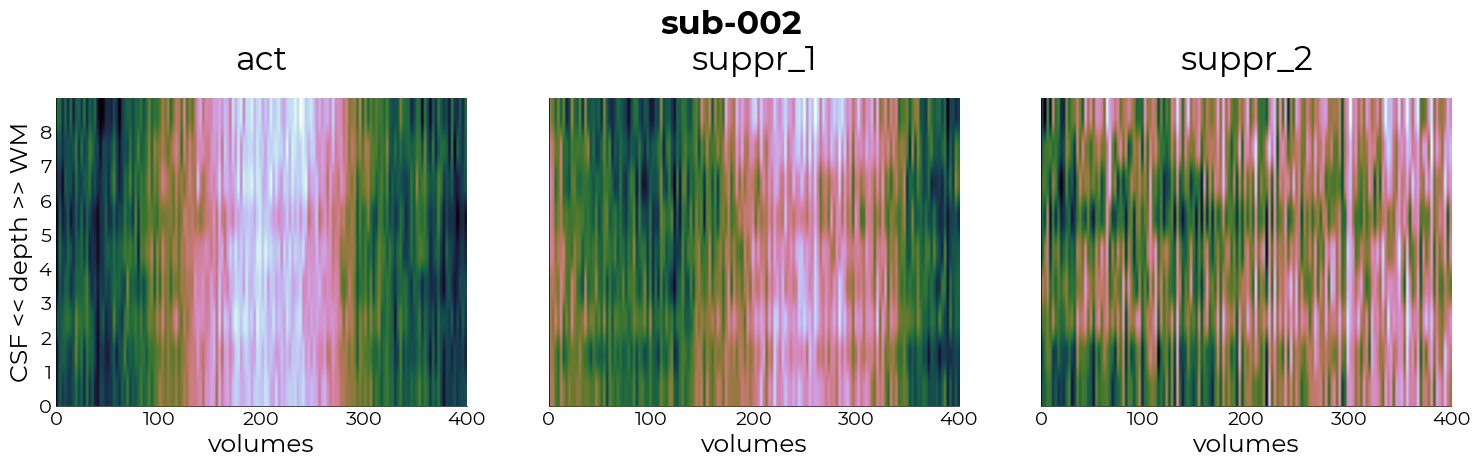

In [75]:
single_ribbon_epoch = hr.data.make_single_df(ribbon_epoch, idx=["subject","run","event_type","epoch"])

evs = utils.get_unique_ids(single_ribbon_epoch, id="event_type")
fig,axs = plt.subplots(ncols=len(evs), figsize=(18,4), sharey=True, sharex=True)

show_vols = 400
for ix,ev in enumerate(evs):

    ddf = utils.select_from_df(single_ribbon_epoch, expression=f"event_type = {ev}")
    avg_im = ddf.groupby(["subject","t"]).mean().values.T

    if ix == 0:
        y_lbl = "CSF << depth >> WM"
    else:
        y_lbl = None
        
    axs[ix].imshow(
        avg_im, 
        aspect="auto",
        cmap="cubehelix",
        extent=[0,show_vols,0,avg_im.shape[0]],
    )
    
    plotting.conform_ax_to_obj(
        axs[ix], 
        title={"title": ev, "font_size": pl.font_size},
        y_label=y_lbl,
        x_label="volumes",
        y_ticks=list(np.arange(0,avg_im.shape[0]))
    )

fig.suptitle(subject, fontsize=pl.title_size, fontweight="bold", y=1.1)
fname = opj(fig_dir, f"{subject}_ses-{sesID}_desc-xinyu_epochs")
ext_list = ["png"]
for ext in ext_list:
    fig.savefig(
        f"{fname}.{ext}",
        bbox_inches="tight",
        dpi=300,
        facecolor="white"
    )

## Deconvolve over depth

In [80]:
# deconvolve
can_fit = fitting.NideconvFitter(
    df_f,
    utils.select_from_df(df_s, expression=("event_type != response","&","event_type != blink")), 
    basis_sets='canonical_hrf_with_time_derivative', #_dispersion',
    # basis_sets="fourier",
    # n_regressors=4,
    TR=0.105,
    interval=[-2,26],
    verbose=True,
    conf_intercept=True,
)
can_fit.timecourses_condition()

Selected 'canonical_hrf_with_time_derivative'-basis sets (with 2 regressors)
Adding event 'act' to model
Adding event 'suppr_1' to model
Adding event 'suppr_2' to model
Fitting with 'ols' minimization
Done


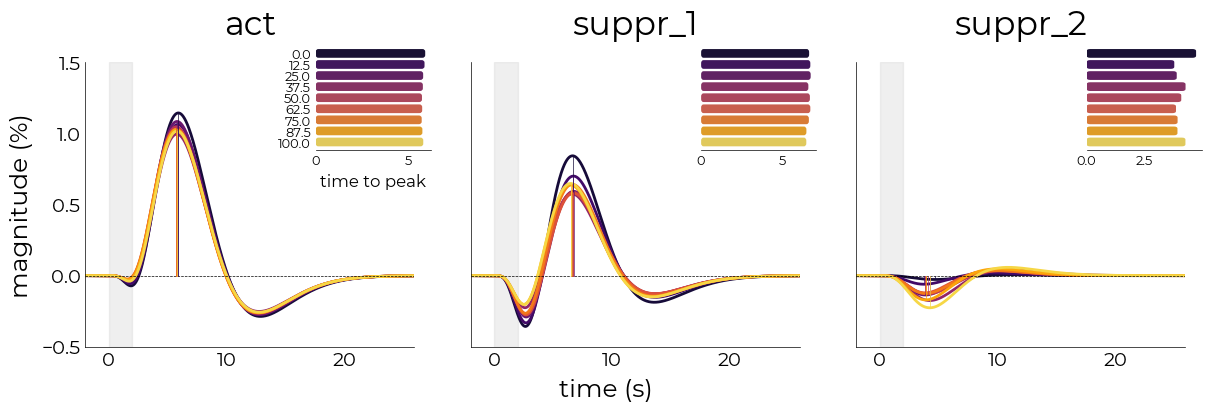

In [81]:
depth = np.linspace(0,100,num=can_fit.tc_condition.shape[-1])
depth

figsize = (len(can_fit.cond)*4,4)
fig,axs = plt.subplots(
    ncols=len(can_fit.cond), 
    figsize=figsize, 
    gridspec_kw={"wspace": 0.1}, 
    sharey=True, 
    sharex=True,
    constrained_layout=True
)

for ix,ev in enumerate(can_fit.cond):
    # if ix+1 == len(can_fit.cond):
    # if ix == 0:
    #     lbl = [f"{round(i,2)}%" for i in depth]
    # else:
    lbl = None
    
    try:
        ev_title = f"{round(float(ev),2)} (dva)"
    except:
        ev_title = ev

    df = utils.select_from_df(can_fit.tc_condition, expression=f"event_type = {ev}")
    ev_prof = list(df.values.T)
    pl = plotting.LazyPlot(
        ev_prof,
        xx=df.index.get_level_values("time").values,
        line_width=2,
        axs=axs[ix],
        title=ev_title,
        add_hline=0,
        # x_ticks=[0,5,10,15,20],
        # y_ticks=[-0.25,0,1],
        labels=lbl,
        cmap="inferno",
        y_lim=[-0.5,1.5]
        # legend_kwargs={"fontsize": 11}
    )

    axs[ix].axvspan(0,2, ymax=1, alpha=0.3, color="#cccccc")

    if ix == 0:
        try:
            lbl = [str(round(float(i),2)) for i in depth]
        except:
            lbl = depth

        x_lbl = "time to peak"
        add_lbl = True
    else:
        lbl = None
        x_lbl = None
        add_lbl = False

    left,bottom,width,height = 0.7,0.7,0.35,0.35
    ax2 = axs[ix].inset_axes([left, bottom, width, height])
    can_fit.plot_ttp(
        df,
        axs=ax2,
        hrf_axs=pl.axs,
        ttp_lines=True,
        font_size=pl.font_size/1.5,
        label_size=pl.label_size/1.5,
        fancy=True,
        sns_offset=1.5,
        add_labels=add_lbl,
        ttp_labels=lbl,
        x_label=x_lbl,
        cmap="inferno"
    )
    
fig.supxlabel("time (s)", fontsize=pl.font_size)
fig.supylabel("magnitude (%)", fontsize=pl.font_size)
fig.show()

fname = opj(fig_dir, f"{subject}_ses-{sesID}_desc-deconvolved")
ext_list = ["png"]
for ext in ext_list:
    fig.savefig(
        f"{fname}.{ext}",
        bbox_inches="tight",
        dpi=300,
        facecolor="white"
    )

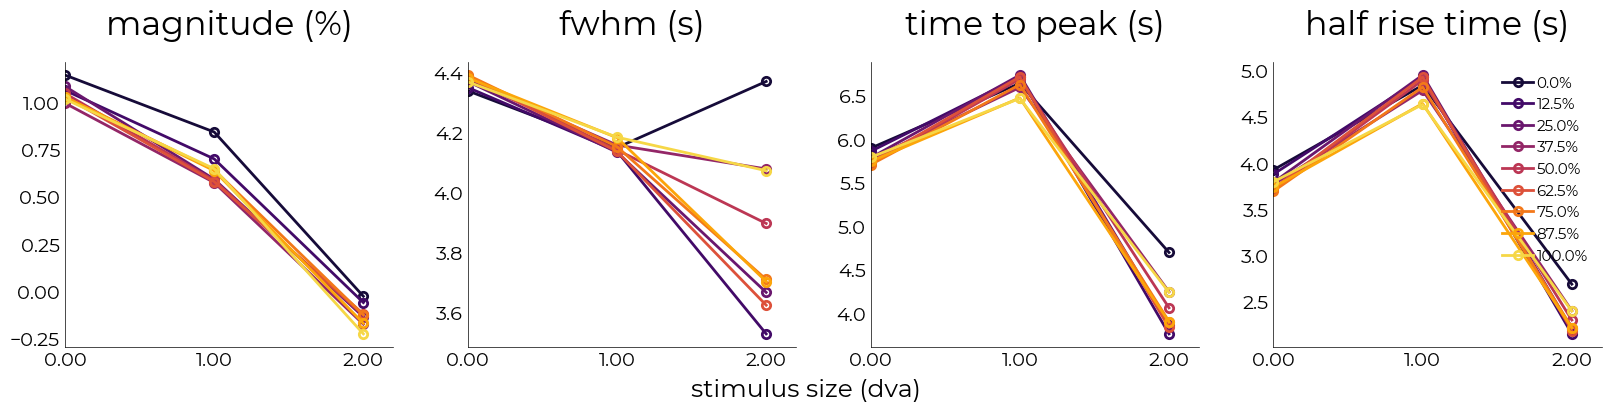

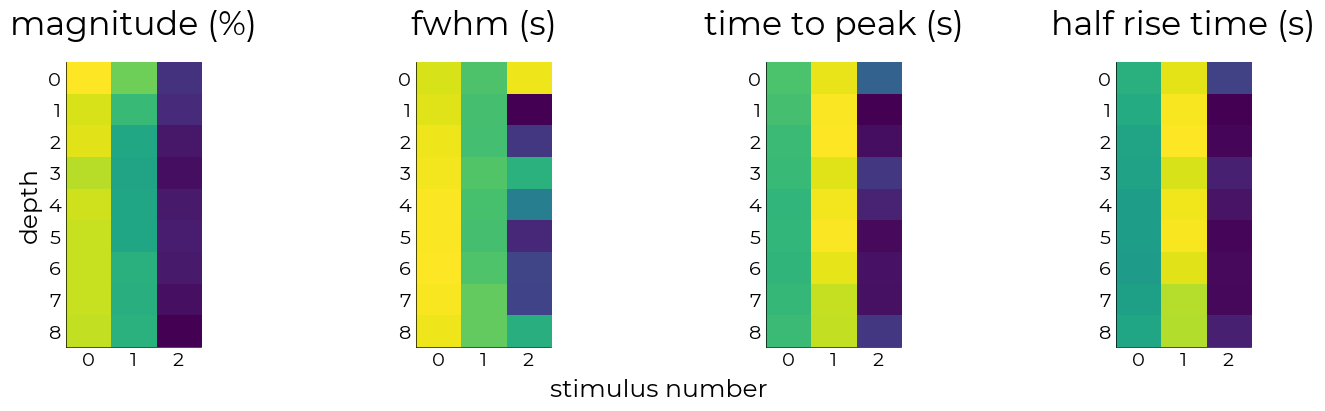

In [82]:
from holeresponse import viz

df_pars = []
for ix,ev in enumerate(can_fit.cond):
    pars = fitting.HRFMetrics(utils.select_from_df(can_fit.tc_condition, expression=f"event_type = {ev}")).return_metrics()
    pars["sizes"] = ix
    pars["depth"] = depth
    df_pars.append(pars)
df_pars = pd.concat(df_pars, ignore_index=False)
df_pars.head()

fname = opj(fig_dir, f"{subject}_ses-{sesID}_desc-depth_pars.png")
stim_pars = viz.PlotStimPars(df=df_pars)
stim_pars.plot_metrics_across_stims(
    fig_kwargs={"gridspec_kw": {"wspace": 0.1}},
    legend_kwargs={"fontsize": 11},
    plot_kw={
        "markerfacecolor": "none",
        "markeredgewidth": 2
    },
    save_as=fname
)

fname = opj(fig_dir, f"{subject}_ses-{sesID}_desc-depth_pars_im.png")
stim_pars.imshow_metrics_across_stims(
    aspect=0.7,
    save_as=fname
)

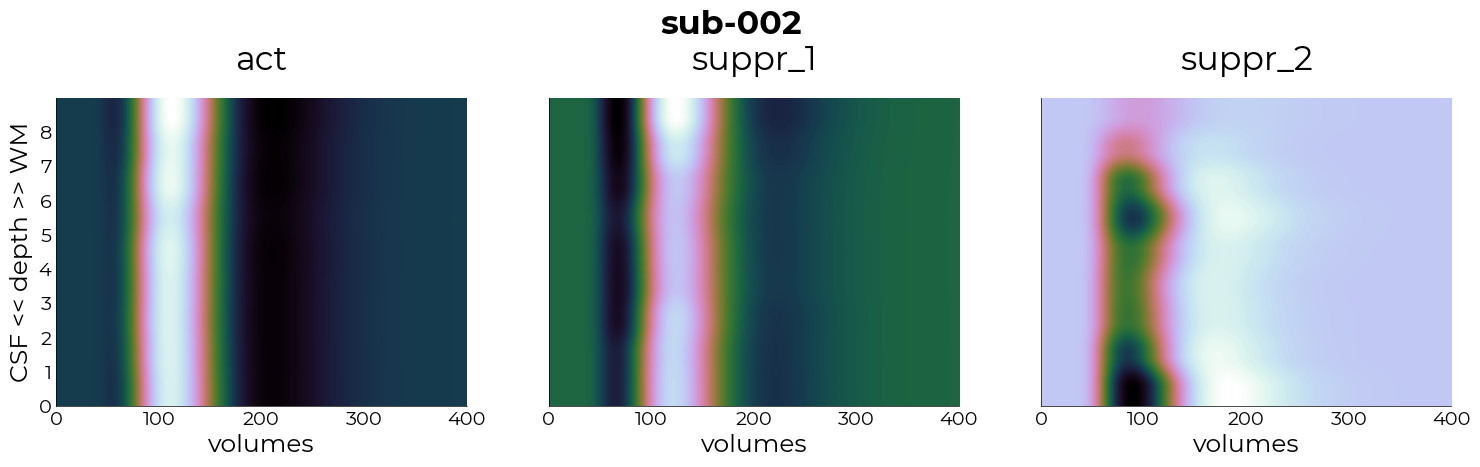

In [83]:
single_ribbon_epoch = hr.data.make_single_df(ribbon_epoch, idx=["subject","run","event_type","epoch"])

evs = utils.get_unique_ids(single_ribbon_epoch, id="event_type")
fig,axs = plt.subplots(ncols=len(evs), figsize=(18,4), sharey=True, sharex=True)

for ix,ev in enumerate(evs):

    ev1 = utils.select_from_df(can_fit.tc_condition, expression=f"event_type = {ev}")

    fc = int((720/ev1.shape[-1]))
    t_ = list(np.unique(ev1.index.get_level_values("time")))

    if ix == 0:
        y_lbl = "CSF << depth >> WM"
    else:
        y_lbl = None
        
    axs[ix].imshow(
        ev1.values.T, 
        aspect="auto",
        cmap="cubehelix",
        extent=[0,show_vols,0,ev1.shape[1]],
    )
    
    plotting.conform_ax_to_obj(
        axs[ix], 
        title={"title": ev, "font_size": pl.font_size},
        y_label=y_lbl,
        x_label="volumes",
        y_ticks=list(np.arange(0,ev1.shape[1]))
    )

fig.suptitle(subject, fontsize=pl.title_size, fontweight="bold", y=1.1)
fname = opj(fig_dir, f"{subject}_ses-{sesID}_desc-xinyu")
ext_list = ["png"]
for ext in ext_list:
    fig.savefig(
        f"{fname}.{ext}",
        bbox_inches="tight",
        dpi=300,
        facecolor="white"
    )

# Simulate target pRF response based on stimuli

In [84]:
pkl_file = f"/data1/projects/MicroFunc/Jurjen/projects/VE-SRF/derivatives/prf/{subject}/ses-1/{subject}_ses-1_task-2R_model-norm_stage-iter_desc-prf_params.pkl"
dm = opj(os.path.dirname(pkl_file), "design_task-2R.mat")
data_fn = opj(os.path.dirname(pkl_file), f"{subject}_ses-1_task-2R_hemi-LR_desc-avg_bold.npy")
data = np.load(data_fn)

obj = prf.pRFmodelFitting(
    data.T,
    design_matrix=dm,
    TR=1.5,
    verbose=True,
    model="norm"
)
obj.load_params(pkl_file, model="norm", stage="iter")


Reading design matrix from '/data1/projects/MicroFunc/Jurjen/projects/VE-SRF/derivatives/prf/sub-002/ses-1/design_task-2R.mat'
Design has 4 more volumes than timecourses, trimming from beginning of design to (100, 100, 221)
Reading settings from '/data1/projects/MicroFunc/Jurjen/projects/VE-SRF/code/prf_analysis.yml'
Instantiate HRF with: [1, 4.6, 0] (fit=False)
Using constraint(s): ['tc', 'tc']
Reading settings from '/data1/projects/MicroFunc/Jurjen/projects/VE-SRF/derivatives/prf/sub-002/ses-1/sub-002_ses-1_task-2R_model-norm_stage-iter_desc-prf_params.pkl' (safest option; overwrites other settings)
Inserting parameters from <class 'str'> as 'norm_iter' in <linescanning.prf.pRFmodelFitting object at 0x7fb4029f00a0>


In [87]:
targ_file = f"/data1/projects/MicroFunc/Jurjen/projects/VE-SRF/derivatives/pycortex/{subject}/ses-{sesID}/{subject}_ses-{sesID}_desc-coords.csv"
targ_obj = utils.VertexInfo(targ_file)
targ = targ_obj.get("index", hemi="L")
targ

126263

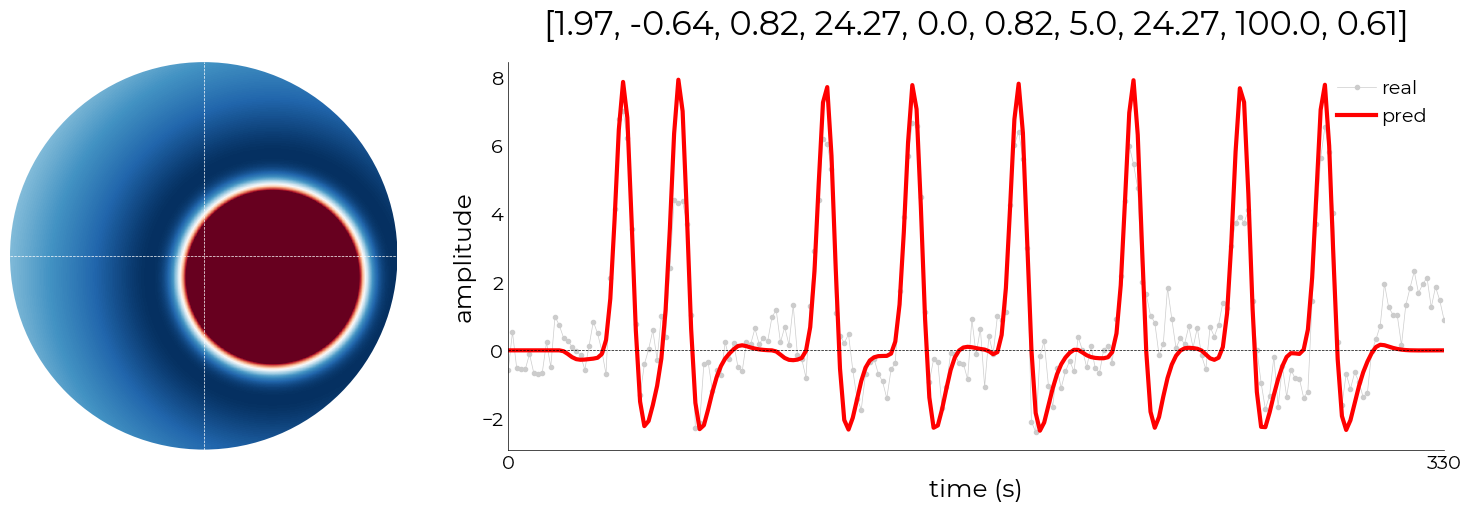

In [88]:
%matplotlib inline
_ = obj.plot_vox(vox_nr=targ, model="norm", title="pars")


In [98]:
# create design matrix from images

log_dir = "/data1/projects/MicroFunc/Jurjen/programs/project_repos/LineExps/ActNorm3/logs"
scr_path = opj(
    log_dir, 
    f"{subject}_ses-{sesID}_task-SRFa_run-demo", 
    f"{subject}_ses-{sesID}_task-SRFa_run-demo_Screenshots"
)

if not os.path.exists(scr_path):
    raise ValueError(f"Could not find directory: '{scr_path}'")
ff = utils.FindFiles(scr_path, extension="png").files

print(ff, sep="\n")

if len(ff)>0:
    imgs = []
    imgs_bin = []
    for file in ff:
        img = (255*mpimg.imread(file)).astype('int')
        img_bin = np.zeros_like(img[...,0])
        img_bin[np.where(((img[..., 0] < 40) & (img[..., 1] < 40)) | ((img[..., 0] > 200) & (img[..., 1] > 200)))] = 1
        imgs.append(img)
        imgs_bin.append(img_bin)

['/data1/projects/MicroFunc/Jurjen/programs/project_repos/LineExps/ActNorm3/logs/sub-002_ses-3_task-SRFa_run-demo/sub-002_ses-3_task-SRFa_run-demo_Screenshots/sub-002_ses-3_task-SRFa_run-demo_Screenshots1.png', '/data1/projects/MicroFunc/Jurjen/programs/project_repos/LineExps/ActNorm3/logs/sub-002_ses-3_task-SRFa_run-demo/sub-002_ses-3_task-SRFa_run-demo_Screenshots/sub-002_ses-3_task-SRFa_run-demo_Screenshots2.png', '/data1/projects/MicroFunc/Jurjen/programs/project_repos/LineExps/ActNorm3/logs/sub-002_ses-3_task-SRFa_run-demo/sub-002_ses-3_task-SRFa_run-demo_Screenshots/sub-002_ses-3_task-SRFa_run-demo_Screenshots3.png']


In [149]:
r1 = utils.select_from_df(can_fit.onsets, expression=f"run = 1")
f1 = utils.select_from_df(can_fit.func, expression=f"run = 1")

dm = simulate.ITI.create_prf_design(
    r1, 
    n_trs=f1.shape[0],
    tr=0.105, 
    stim_at_half_tr=False, 
    stims=imgs_bin,
    events=list(can_fit.cond),
    make_square=True,
    n_pix=100
)
dm.shape

(100, 100, 3600)

In [135]:
obj_l = prf.pRFmodelFitting(
    f1.mean(axis=1).values[np.newaxis,...],
    design_matrix=dm,
    TR=0.105,
    verbose=True,
    model="norm",
    screen_distance_cm=196,
)

obj_l.load_params(obj.norm_iter[targ,:], model="norm", stage="iter")

Reading settings from '/data1/projects/MicroFunc/Jurjen/projects/VE-SRF/code/prf_analysis.yml'


Instantiate HRF with: [1, 4.6, 0] (fit=False)
Setting 'screen_distance_cm' to user-defined value: 196 (was: 210)
Using constraint(s): ['tc', 'tc']
Inserting parameters from <class 'numpy.ndarray'> as 'norm_iter' in <linescanning.prf.pRFmodelFitting object at 0x7fb4028a8dc0>


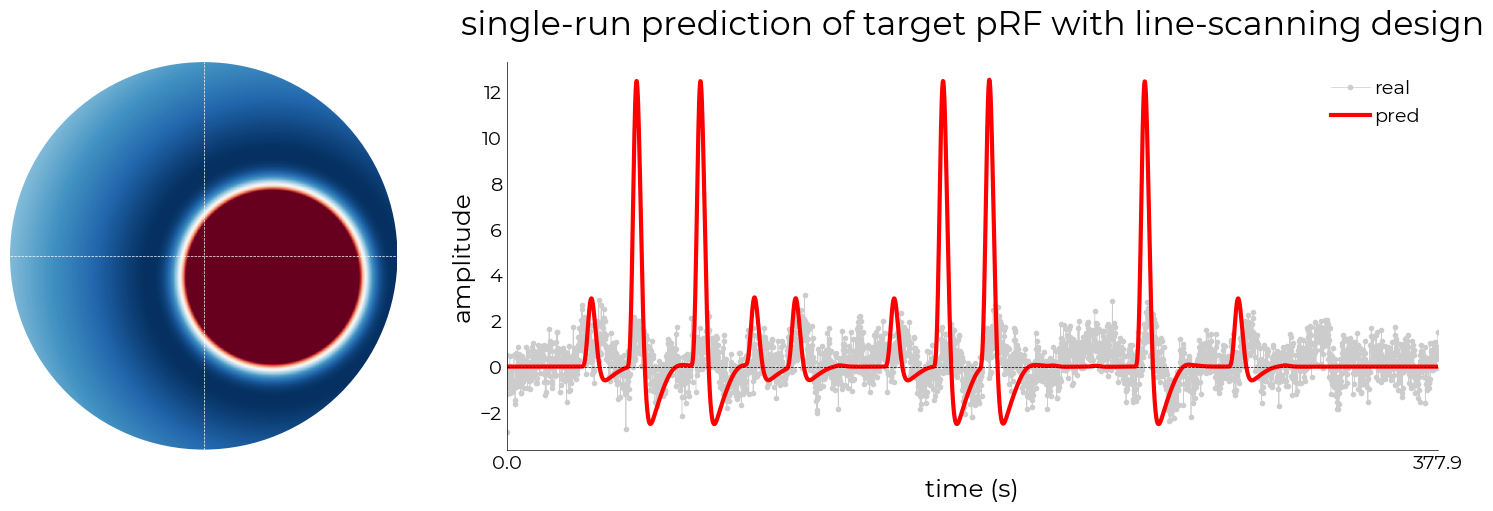

In [148]:
%matplotlib inline
_ = obj_l.plot_vox(
    vox_nr=0, 
    model="norm", 
    title="single-run prediction of target pRF with line-scanning design",
)


In [ ]:

# deconvolve
lump_fit = fitting.NideconvFitter(
    df_f,
    df_s, #, expression="event_type != response"), 
    basis_sets='canonical_hrf_with_time_derivative', #_dispersion',
    TR=0.105,
    interval=[0,25],
    verbose=True,
    # conf_intercept=True,
    add_intercept=True,
    fit=True
)

#plot
fig,axs = plt.subplots(figsize=(6,6))
lump_fit.plot_average_per_event(
    x_label="time (s)",
    add_offset=False,
    y_label="magnitude (%)",
    add_hline='default',
    axs=axs,
    title=f"average 10 runs",
    labels=lump_fit.cond,
    line_width=2,
    cmap='inferno',
    fancy=True)

# fname = opj(fig_dir, f"{subject}_ses-{sesID}_desc-deconvolved")
# for ext in ["pdf"]:
#     fig.savefig(
#         f"{fname}.{ext}",
#         bbox_inches="tight",
#         dpi=300,
#         facecolor="white"
#     )     

Selected 'canonical_hrf_with_time_derivative'-basis sets (with 2 regressors)
Adding event '0.7' to model


Adding event '1.0' to model
Adding event '2.0' to model
Adding event '4.0' to model
Fitting with 'ols' minimization
Done
Selected 'canonical_hrf_with_time_derivative'-basis sets (with 2 regressors)
Adding event '0.7' to model
Adding event '1.0' to model
Adding event '2.0' to model
Adding event '4.0' to model
Fitting with 'ols' minimization
Done
Selected 'canonical_hrf_with_time_derivative'-basis sets (with 2 regressors)
Adding event '0.7' to model
Adding event '1.0' to model
Adding event '2.0' to model
Adding event '4.0' to model
Fitting with 'ols' minimization
Done
Selected 'canonical_hrf_with_time_derivative'-basis sets (with 2 regressors)
Adding event '0.7' to model
Adding event '1.0' to model
Adding event '2.0' to model
Adding event '4.0' to model
Fitting with 'ols' minimization
Done
Selected 'canonical_hrf_with_time_derivative'-basis sets (with 2 regressors)
Adding event '0.7' to model
Adding event '1.0' to model
Adding event '2.0' to model
Adding event '4.0' to model
Fitting with

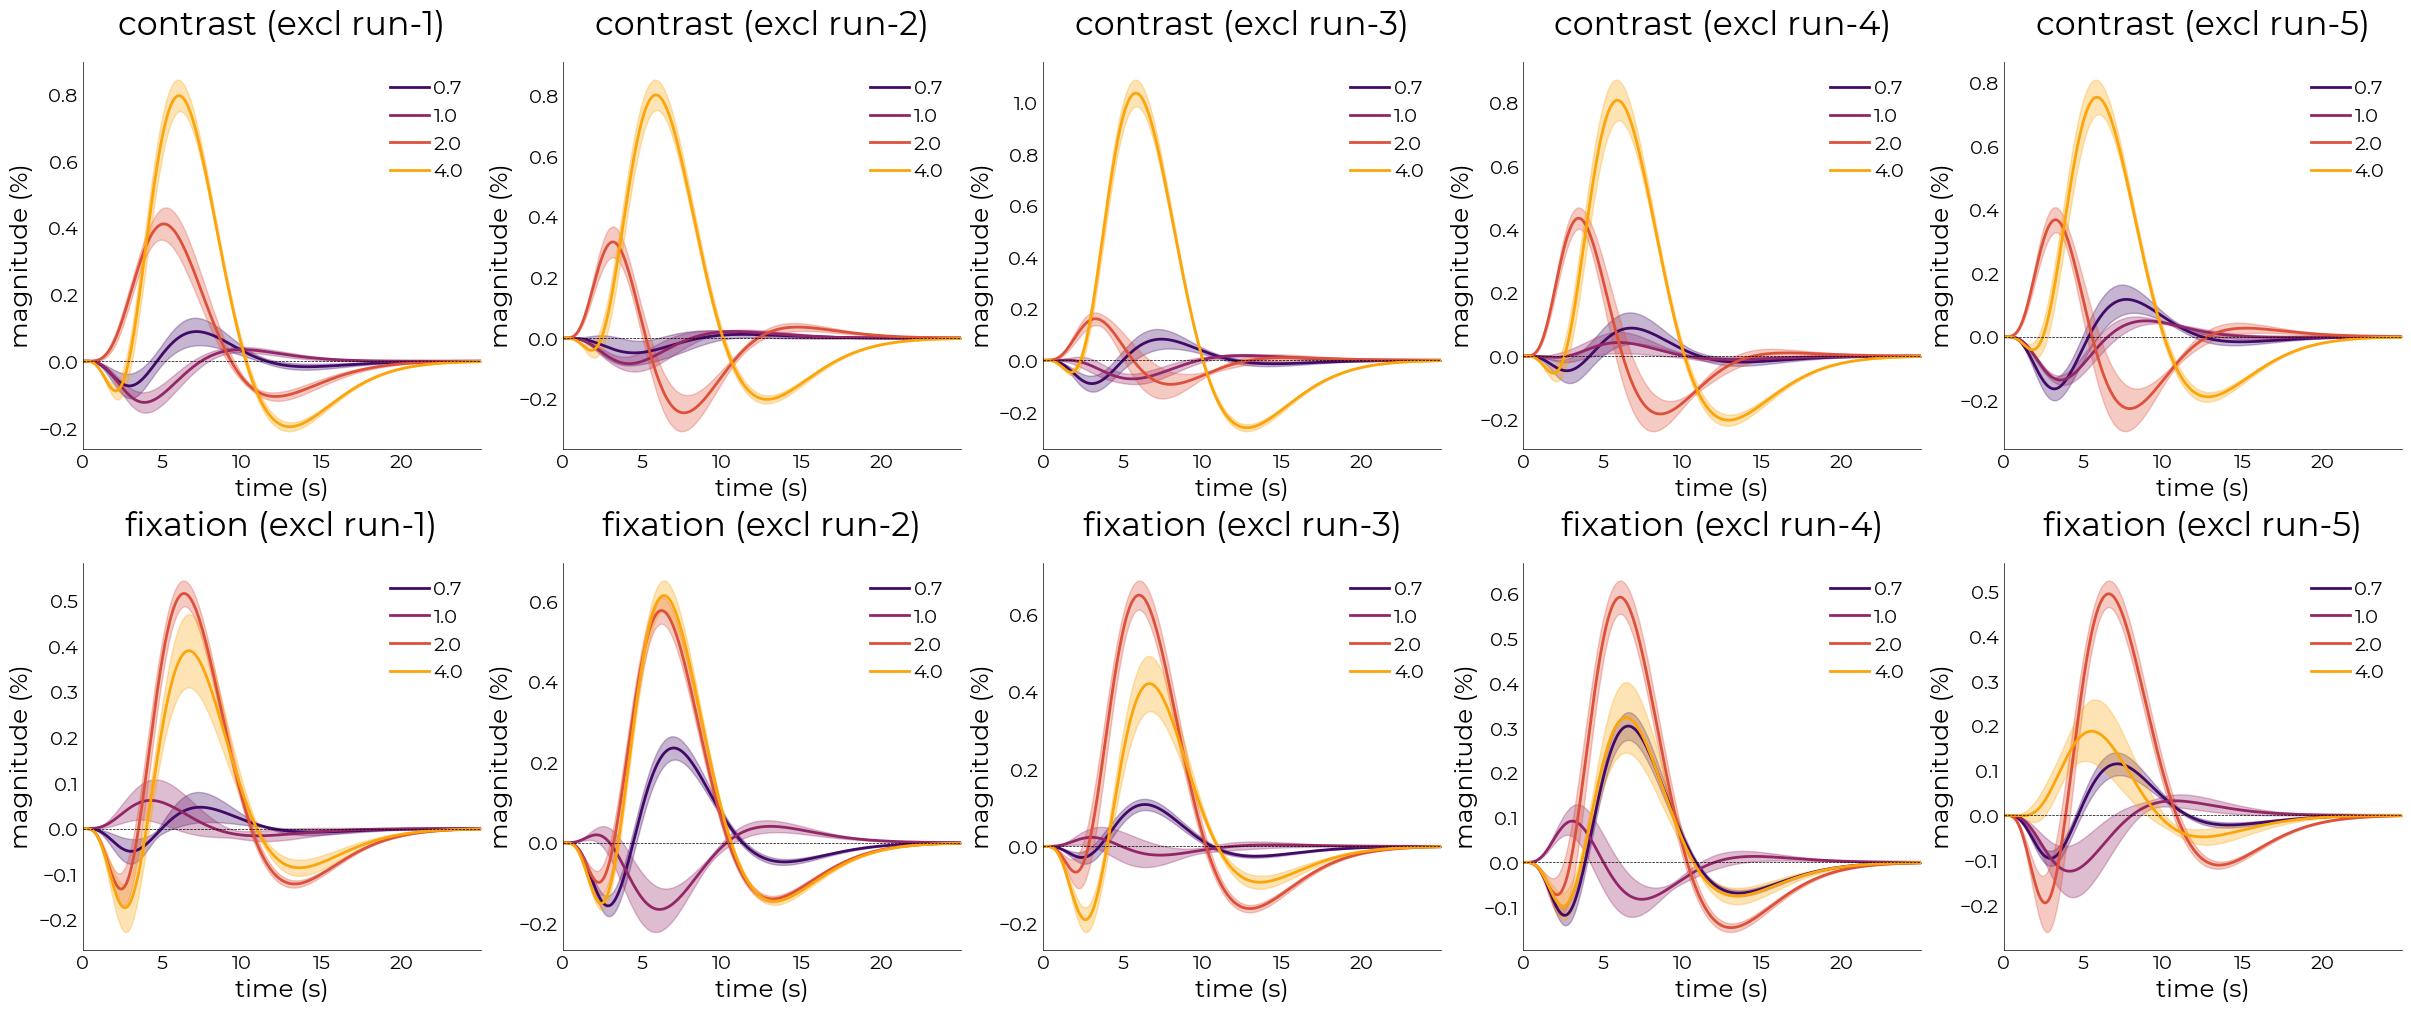

In [98]:
fig,axs = plt.subplots(ncols=5,nrows=2, figsize=(24,10), constrained_layout=True)
for t_ix,task in enumerate(utils.get_unique_ids(df_func, id="task")):

    df_fix = utils.select_from_df(df_ribbon, expression=f"task = {task}")
    stim_fix = utils.select_from_df(df_onsets, expression=(f"task = {task}","&","event_type != response"))

    # fit events on averaged data
    for ix,i in enumerate(utils.get_unique_ids(df_fix, id="run")):
        expr = f"run != {i}"
        can_fit = fitting.NideconvFitter(
            utils.select_from_df(df_fix, expression=expr),
            utils.select_from_df(stim_fix, expression=expr), 
            basis_sets='canonical_hrf_with_time_derivative', #_dispersion',
            # n_regressors=4,
            TR=0.105,
            interval=[0,25],
            verbose=True,
            # conf_intercept=True,
            add_intercept=True,
            fit=True
        )

        can_fit.plot_average_per_event(
            x_label="time (s)",
            add_offset=False,
            y_label="magnitude (%)",
            add_hline='default',
            axs=axs[t_ix,ix],
            title=f"{task} (excl run-{i})",
            labels=[round(float(i),2) for i in can_fit.cond],
            line_width=2,
            cmap='inferno',
            fancy=True)

fname = opj(fig_dir, f"{subject}_ses-{sesID}_desc-deconvolved_excl_runs")
for ext in ["pdf"]:
    fig.savefig(
        f"{fname}.{ext}",
        bbox_inches="tight",
        dpi=300,
        facecolor="white"
    )             